## TP4: Graph

In [8]:
import kagglehub
import matplotlib.pyplot as plt
import networkx as nx
import os


### Telechargement du graphe de kaggle

In [9]:
path = kagglehub.dataset_download('mateuscco/toy-network-datasets')
print("path to dataset files:", path)


path to dataset files: C:\Users\rayan\.cache\kagglehub\datasets\mateuscco\toy-network-datasets\versions\1


### Chargement du graph

In [ ]:
# Explorer le contenu pour choisir un fichier .net
for root, dirs, files in os.walk(path):
    net_files = [f for f in files if f.endswith('.net')]
    if net_files:
        print("Fichier .net trouvé :", net_files[0])
        net_file_path = os.path.join(root, net_files[0])
        break

G = nx.read_pajek(net_file_path)

print("Nombre de nœuds :", G.number_of_nodes())
print("Nombre d'arêtes :", G.number_of_edges())


Fichier .net trouvé : 26KeroNetwork.net
Nombre de nœuds : 135
Nombre d'arêtes : 318


### Visualisation du graphe

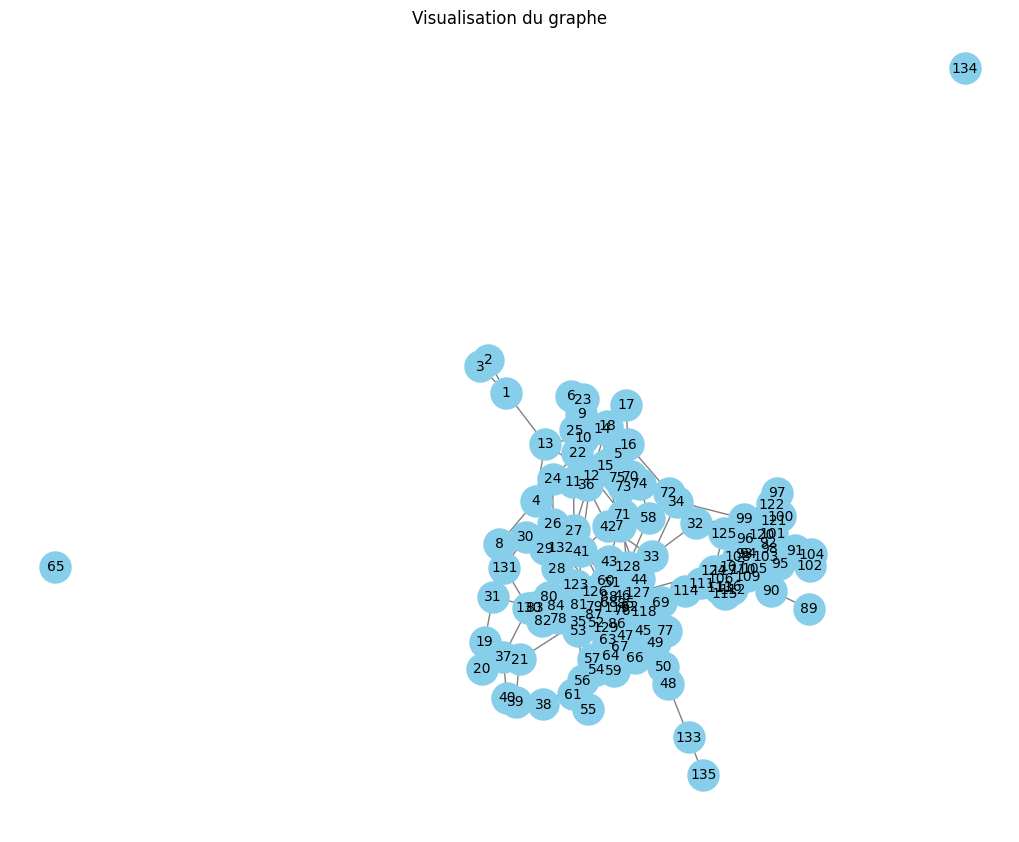

In [11]:
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # positionnement des nœuds
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500, font_size=10)
plt.title("Visualisation du graphe")
plt.show()

### Dictionnaire de degré de chaque noeud

In [12]:
degrees = dict(G.degree())  # dictionnaire {noeud: degré}
print("Degrés des premiers nœuds :", list(degrees.items())[:10])


Degrés des premiers nœuds : [('1', 3), ('2', 2), ('3', 2), ('4', 4), ('5', 4), ('6', 2), ('7', 3), ('8', 3), ('9', 4), ('10', 7)]


### Distribution des degrés

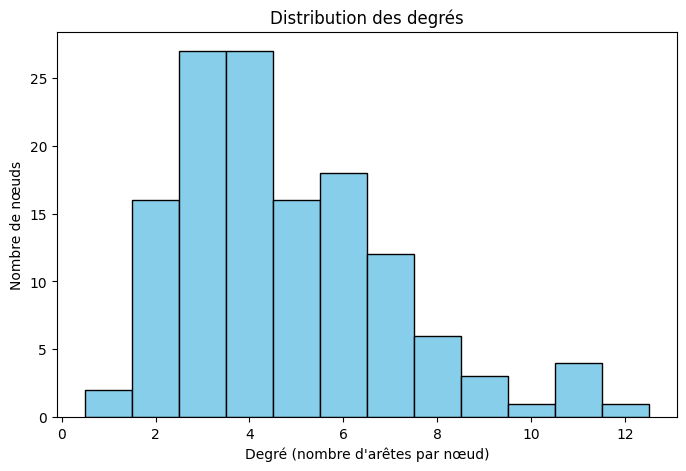

In [13]:
plt.figure(figsize=(8, 5))
plt.hist(list(degrees.values()), bins=range(1, max(degrees.values())+2), 
         color="skyblue", edgecolor="black", align="left")
plt.xlabel("Degré (nombre d'arêtes par nœud)")
plt.ylabel("Nombre de nœuds")
plt.title("Distribution des degrés")
plt.show()

### Visualisation avec ipycytoscape

In [14]:
import networkx as nx
import ipycytoscape

cyto_graph = ipycytoscape.CytoscapeWidget()
cyto_graph.graph.add_graph_from_networkx(
    G,
    directed=nx.is_directed(G)
)

# Personnalisation
for node in cyto_graph.graph.nodes:
    node_id = node.data['id']   # utiliser .data et pas node['id']
    node.data['color'] = "skyblue"
    node.data['size'] = 20 + 5 * G.degree(node_id)

cyto_graph.set_style(
    [
        {
            "selector": "node",
            "style": {
                "label": "data(id)",
                "background-color": "data(color)",
                "width": "data(size)",
                "height": "data(size)",
                "font-size": "10px",
            }
        },
        {
            "selector": "edge",
            "style": {
                "line-color": "#888",
                "width": 1
            }
        }
    ]
)

cyto_graph



CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node', 'style': {'label': 'd…